In [69]:
import json
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, \
    precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import tensorflow.keras as keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


In [71]:
# Testing packages 
import ipytest 
import pytest
import doctest
from unittest.mock import patch 
# Configure pytest
ipytest.autoconfig()

In [72]:
cwd = os.getcwd()
AUDIO_FILE = os.path.abspath("..\\Datasets\\Data\\A2.wav")
signal, sr = librosa.load(AUDIO_FILE)
signal_nom = librosa.util.normalize(signal)
mfcc = librosa.feature.mfcc(signal, n_mfcc=13, sr=sr)
spectrogram = librosa.feature.melspectrogram(signal)
spectrogram = librosa.power_to_db(spectrogram)

c:\Users\Stephen\.virtualenvs\Automatic-Music-Transcription-yc1OTF3l\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Pass y=[ 0.00110574  0.0026101   0.00243133 ... -0.00079542  0.00019755
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """
c:\Users\Stephen\.virtualenvs\Automatic-Music-Transcription-yc1OTF3l\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Pass y=[ 0.00110574  0.0026101   0.00243133 ... -0.00079542  0.00019755
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


In [77]:
# signal_db = librosa.amplitude_to_db(signal)
def plot_wave(audio_path:str, normalize=False, font_size=10):
    """Plots a wave plot of audio file 

    Args:
        audio_path (str): path to audio file 
        normalize (bool, optional): normalize the audio. Defaults to False.
        font_size (int, optional): font size for the graph. Defaults to 10.
    """
    plt.rcParams.update({'font.size': font_size})
    signal, sr = librosa.load(audio_path)
    if normalize:
        signal = librosa.util.normalize(signal)
    else:
        librosa.display.waveshow(y=signal, sr=sr)
        plt.title("Waveform", fontsize = font_size, fontweight ='bold')
        plt.ylabel("Amplitude ")
        plt.xlabel("Time (s)")
        plt.show()

.                                                                                            [100%]
1 passed in 0.53s


<ExitCode.OK: 0>

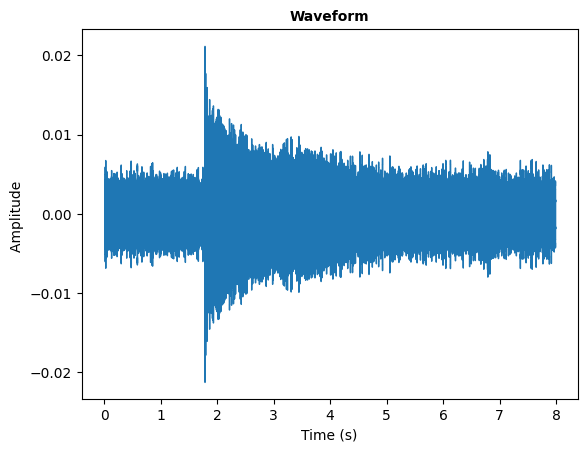

In [78]:
ipytest.clean_tests()  # Allows renaming tests

@patch("matplotlib.pyplot.show")
def test_plot_wave(mock_show):
    plot_wave(audio_path=AUDIO_FILE)

ipytest.run()

In [84]:
def plot_mfcc(audio_path:str, normalize=False, n_mfcc=13, bins=13, font_size=10):
    plt.rcParams.update({'font.size': font_size})
    signal, sr = librosa.load(audio_path)
    if normalize:
        signal = librosa.util.normalize(signal)
    mfcc = librosa.feature.mfcc(signal, n_mfcc=n_mfcc, sr=sr)
    librosa.display.specshow(mfcc, sr=sr, x_axis="time", y_axis="log", bins_per_octave=bins)
    plt.title("MFCC", fontsize = font_size, fontweight ='bold')
    plt.colorbar(format="%+2f")
    plt.ylabel("Mel Coefficients")
    plt.xlabel("Time (s)")
    plt.show()

.                                                                                            [100%]
======================================== warnings summary =========================================
tmpxvumlq1o.py::test_plot_wave
  c:\Users\Stephen\Documents\GitHub_Repositories\Automatic-Music-Transcription\src\LSTM\tmpxvumlq1o.py:7: FutureWarning: Pass y=[ 0.00110574  0.0026101   0.00243133 ... -0.00079542  0.00019755
    0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html
1 passed, 1 warning in 0.87s


<ExitCode.OK: 0>

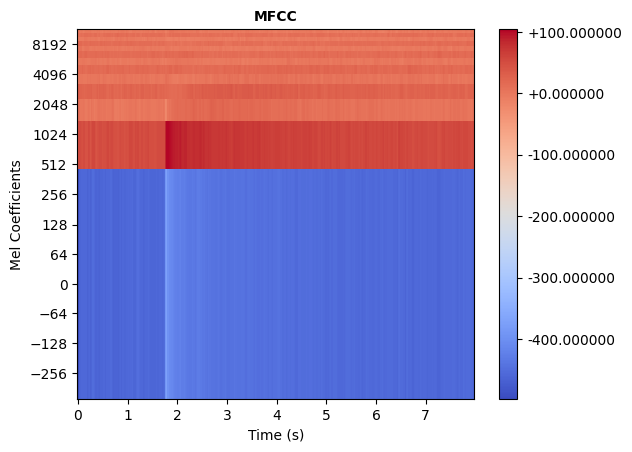

In [83]:
ipytest.clean_tests()  # Allows renaming tests

@patch("matplotlib.pyplot.show")
def test_plot_wave(mock_show):
    plot_mfcc(audio_path=AUDIO_FILE)

ipytest.run()

c:\Users\Stephen\.virtualenvs\Automatic-Music-Transcription-yc1OTF3l\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Pass y=[ 0.05215063  0.12310132  0.1146697  ... -0.03751476  0.00931718
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


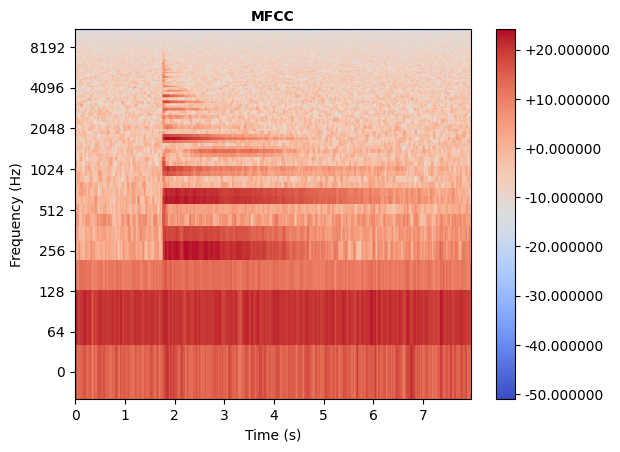

In [87]:
def plot_spectrogram(audio_path:str, normalize=False, bins=13, font_size=10):
    plt.rcParams.update({'font.size': font_size})
    signal, sr = librosa.load(audio_path)
    if normalize:
        signal = librosa.util.normalize(signal)
    spectrogram = librosa.feature.melspectrogram(signal)
    spectrogram = librosa.power_to_db(spectrogram)
    librosa.display.specshow(spectrogram, sr=sr, x_axis="time", y_axis="log", bins_per_octave=bins)
    plt.title("MFCC", fontsize = font_size, fontweight ='bold')
    plt.colorbar(format="%+2f")
    plt.ylabel("Frequency (Hz)")
    plt.xlabel("Time (s)")
    plt.show()

plot_spectrogram(AUDIO_FILE, normalize=True)